# 1. Simulación de variables aleatorias

## 1.1. CDF es conocida e invertible

Suponga que $f_X(x)=x\textrm{e}^{-\frac{x^2}{2}}\mathbf{1}_{x\geq0}$ (distribución Rayleigh)

1. Calule la CDF
2. Invierta la CDF
3. Simule $10^6$ observaciones
4. Dibuje el histograma y superpongalo a la PDF

si la funcion de densidad tiene 2 modas y solo da 1, está mal.
Se tiene que comprobar

In [1]:
import numpy as np # Algebra matricial
from math import exp
import matplotlib.pyplot as plt # gráficos
from scipy.stats import multivariate_t, invgamma
from scipy.optimize import minimize


import random # Simulacion aleatoria
random.seed( 0 ) # Fijando la semilla (reproducir resultados)
np.random.seed( 0 ) # Fijando la semilla (reproducir resultados)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

La CDF es
$$F_X(x)=\int_{-\infty}^xu\textrm{e}^{-\frac{u^2}{2}}du=1-\textrm{e}^{-\frac{x^2}{2}}$$
su inversa es
$$F_X^{-1}(u)=\sqrt{-2\log(1-u)}$$
creando $n=10^6$ simulaciones

ha cambiado de x a u porque es una medida.

calculo la integral.

la funcion ex invertible, la segunda ec es la inversa.

fx es una probabilidad, u está entre 0 y 1, el log de esa parte es negativo y multiplicado x -2 se hace positivo.

se integra de acuerdo a una medida, es la medida de integracion.

In [2]:
nsample = 10**6
usim = np.random.uniform(0,1,(nsample,1))
xsim = np.sqrt(-2*np.log(1-usim))

la primera linea n sample es la cantidad de simulaciones

la segunda linea es el rango

la 3era es que a cada elemento le aplique la funcion, se trabaja con numpy

generando gráficos

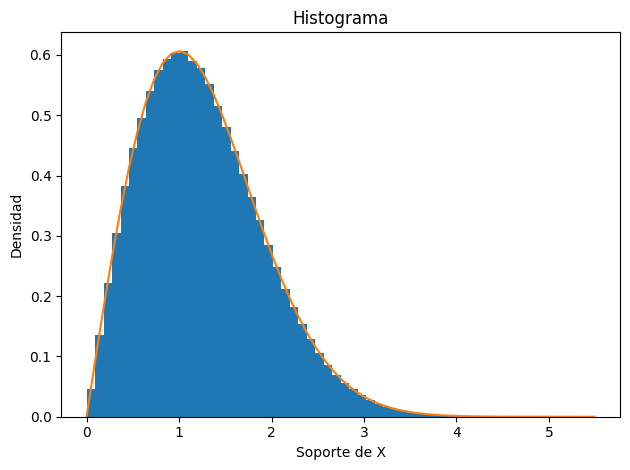

In [3]:
num_bins = 60
fig, ax = plt.subplots()
n, bins, patches = ax.hist(xsim, num_bins, density=1)
pdf = bins*np.exp(-bins**2/2)
ax.plot(bins, pdf)
ax.set_xlabel('Soporte de X')
ax.set_ylabel('Densidad')
ax.set_title(r'Histograma')
fig.tight_layout()

el histograma: la linea anaranjada es la P(F)

la simulación son las barritas, se superponen perfectamente

problemas: el modelo de rayleigh demanda que la P(F) sea invertible, por ejemplo si fuera bivariado-multivariado no seria posible

## 1.2. CDF no invertible: Aceptance-rejection algorithm
Del ejercicio anterior, suponga que $F_X(\cdot)$ no es invertible.
Definamos según la notación de las diapositivas:
* $h(x)=10^{-1}$ (i.e., $h\equiv U(0,10)$)
* $g(x)=x\textrm{e}^{-\frac{x^2}{2}}\mathbf{1}_{x\geq0}$

Calculemos $c$:
$$c=\sup_{x}\frac{g(x)}{h(x)}=\sup_{x}10x\textrm{e}^{-\frac{x^2}{2}}\mathbf{1}_{x\geq0}\Rightarrow x^*=1\text{ y }c=10\textrm{e}^{-\frac{1}{2}}$$

Construyamos una función que implemente el algoritmo:

$$g(x)=f(x)/k\text{ pero si hacemos }k=1\text{ entonces }0\leq\frac{g(x)}{ch(x)}\leq1$$

In [4]:
def get_AR_Rayleigh(c,n):
    count = 0
    rej   = 0
    x = np.zeros(shape=(n,1))
    while count < (n-1):
        # Simulación de U(0,10)
        z_candidato = 10*np.random.uniform(0,1)
        # Simulación de U(0,1)
        u = np.random.uniform(0,1)
        # Aceptar o rechazar
        f_de_candidato = z_candidato*exp(-z_candidato**2/2) #k=1
        h_de_candidato = 1.0/10
        if u <= f_de_candidato/(c*h_de_candidato):
            x[count,0] = z_candidato
            count  += 1
        else:
            rej += 1

    return x, rej

es un loop condicional

simula el umbral

luego calcula el f_de candidato, que usa la ecuacion exponencial hallada, es la f(X) o densidad de rayleigh

si es menor al ratio, tomo al candidato y lo tomo en x

si no es así, lo rechazp

In [5]:
c = 10*exp(-1.0/2)*5
nsample = 5*10**4
xsim_AR, rej = get_AR_Rayleigh(c,nsample)

el n sample se puso ese numero para que no demore mucho

para llegar al histograma, esta rechazando más de un millon, solo esta seleccionando 50 mil

el otro metodo de MH rechaza menos c:

In [6]:
rej

1467772

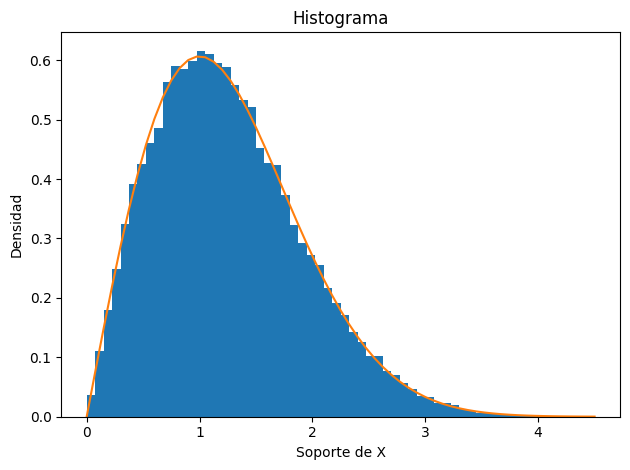

In [7]:
num_bins = 60
fig, ax = plt.subplots()
n, bins, patches = ax.hist(xsim_AR, num_bins, density=1)
pdf = bins*np.exp(-bins**2/2)
ax.plot(bins, pdf)
ax.set_xlabel('Soporte de X')
ax.set_ylabel('Densidad')
ax.set_title(r'Histograma')
fig.tight_layout()

es el histograma y la funcion de densidad

## 1.3. Normal multivariada
Sea $X\sim\mathcal{N}(\mu,\Sigma)$ con $\mu=[0.5\ 5]$ y $\Sigma=\left[\begin{matrix}0.6 & -0.2\\ -0.2 & 0.1\end{matrix}\right]$ utilice la función ```np.random.randn``` para simular $10^6$ realizacioines de $X$

In [8]:
nsample = 10**6
mu = np.array([[0.5],[5]])
Sigma = np.array([[0.6, -0.2],[-0.2, 0.1]])
LTSigma = np.linalg.cholesky(Sigma)
zsim_vec = np.random.randn(2,nsample)
xsim_vec = np.dot(LTSigma,zsim_vec) + np.repeat(mu,nsample,axis=1)

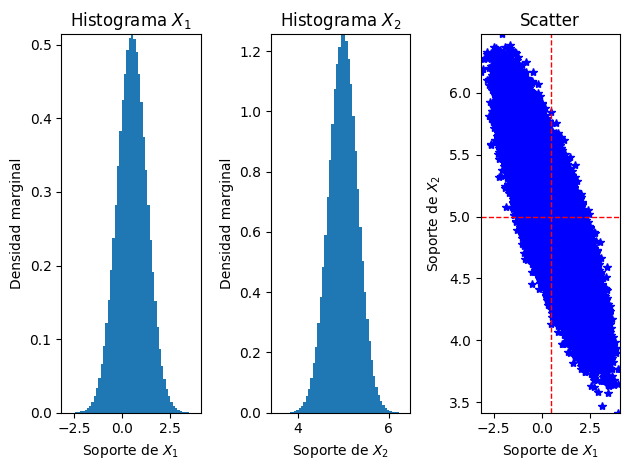

In [9]:
num_bins = 60
fig, (ax0, ax1, ax3) = plt.subplots(1,3)
n, bins, patches = ax0.hist(xsim_vec[0,:], num_bins, density=1)
ax0.set_xlabel('Soporte de $X_1$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $X_1$')
ax0.autoscale(enable=True, axis='both', tight=True)

n, bins, patches = ax1.hist(xsim_vec[1,:], num_bins, density=1)
ax1.set_xlabel('Soporte de $X_2$')
ax1.set_ylabel('Densidad marginal')
ax1.set_title(r'Histograma $X_2$')
ax1.autoscale(enable=True, axis='both', tight=True)


line0, = ax3.plot(xsim_vec[0,:], xsim_vec[1,:], 'b*')
ax3.axhline(5, color='red', lw=1,ls='--')
ax3.axvline(0.5, color='red', lw=1,ls='--')
ax3.set_xlabel('Soporte de $X_1$')
ax3.set_ylabel('Soporte de $X_2$')
ax3.set_title(r'Scatter')
ax3.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()

## Ilustrar GS y MH

A modo de ilustración, consideremos la siguiente función de distribución:
$$\mathbf{X}|z \sim \mathcal{N}(\boldsymbol{\mu},z\boldsymbol{\Omega})\text{ con }z\sim\Gamma^{-1}(\alpha,\beta),$$
donde $\boldsymbol{\mu}\in\mathbb{R}^{2\times1}$, $\boldsymbol{\Omega}$ es una matriz definida positiva de dimensiones $2\times2$, $\alpha>0$ y $\beta>0$.

El objetivo del ejercicio es simular el par $(\mathbf{X},z)$.

Para ello, se emplearán tres metodologías: simulación directa de la función de densidad conjunta o marginales, muestreo de Gibbs (Gibb-sampling) y algoritmo de Metrópolis-Hastings.

### Simulación directa

No contamos con la densidad conjunta. En el caso de las densidades marginales, se tiene la densidad marginal de $z$  pero no la de $\mathbf{X}$. Tratemos de derivar la densidades marginal faltante:

1. La densidad marginal de $z$, dado que $z$ es $\Gamma^{-1}$ es:
$$p(z)=\frac{\beta^{\alpha}}{\Gamma(\alpha)}z^{-\alpha-1}\exp\left(-\frac{\beta}{z}\right)$$
2. Dado que $\mathbf{X}|z \sim \mathcal{N}(\boldsymbol{\mu},z\boldsymbol{\Omega})$ entonces
$$p(\mathbf{X}|z)=\frac{1}{(2\pi) |z\boldsymbol{\Omega}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'(z\boldsymbol{\Omega})^{-1}(\mathbf{X} - \boldsymbol{\mu})\right)$$

------
variable aleatoria, haciendo experimentos de monte carlo, convergen a una distribucion normal. No siempre conocemos la dist exacta.



3. La densidad marginal de $\mathbf{X}$ se obtiene al integrar $z$ en todo su soporte
$$p(\mathbf{X})=\int_zp(\mathbf{X},z)\mathrm{d}z=\int_zp(\mathbf{X}|z)p(z)\mathrm{d}z$$

4. Reemplazando $p(\mathbf{X}|z)$ y $p(z)$ en $p(\mathbf{X})$ resulta en:
$$p(\mathbf{X})=\int_z\frac{1}{(2\pi) |z\boldsymbol{\Omega}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'(z\boldsymbol{\Omega})^{-1}(\mathbf{X} - \boldsymbol{\mu})\right)\frac{\beta^{\alpha}}{\Gamma(\alpha)}z^{-\alpha-1}\exp\left(-\frac{\beta}{z}\right)\mathrm{d}z$$
reduciendo
$$p(\mathbf{X})=\int_z\frac{1}{(2\pi) |\boldsymbol{\Omega}|^{1/2}} \exp\left[-\left(\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'\boldsymbol{\Omega}^{-1}(\mathbf{X} - \boldsymbol{\mu})+\beta\right)z^{-1}\right]\frac{\beta^{\alpha}}{\Gamma(\alpha)}z^{-\alpha-2}\mathrm{d}z$$

5. Definir $\tilde{\beta}=\beta+\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'\boldsymbol{\Omega}^{-1}(\mathbf{X} - \boldsymbol{\mu})$ y $\tilde{\alpha}=1+\alpha$ entonces
$$p(\mathbf{X})=\int_z\frac{1}{(2\pi) |\boldsymbol{\Omega}|^{1/2}} \exp\left[-\frac{\tilde{\beta}}{z}\right]\frac{\beta^{\tilde{\alpha}-1}}{\Gamma(\tilde{\alpha}-1)}z^{-\tilde{\alpha}-1}\mathrm{d}z$$
reacomodando
$$p(\mathbf{X})=\frac{1}{(2\pi) |\boldsymbol{\Omega}|^{1/2}} \frac{\beta^{\tilde{\alpha}-1}\Gamma(\tilde{\alpha})}{\tilde{\beta}^{\tilde{\alpha}}\Gamma(\tilde{\alpha}-1)}\int_z\frac{\tilde{\beta}^{\tilde{\alpha}}}{\Gamma(\tilde{\alpha})}z^{-\tilde{\alpha}-1}\exp\left[-\frac{\tilde{\beta}}{z}\right]\mathrm{d}z$$
note que $\int_z\frac{\tilde{\beta}^{\tilde{\alpha}}}{\Gamma(\tilde{\alpha})}z^{-\tilde{\alpha}-1}\exp\left[-\frac{\tilde{\beta}}{z}\right]\mathrm{d}z=1$ ya que es la PDF de una $\Gamma^{-1}$ de parámetros $\tilde{\alpha}$ y $\tilde{\beta}$. Entonces:
$$p(\mathbf{X})=\frac{1}{(2\pi) |\boldsymbol{\Omega}|^{1/2}} \frac{\beta^{\tilde{\alpha}-1}\Gamma(\tilde{\alpha})}{\tilde{\beta}^{\tilde{\alpha}}\Gamma(\tilde{\alpha}-1)}$$
revirtiendo las definiciones de $\tilde{\alpha}$ y $\tilde{\beta}$:
$$p(\mathbf{X})=\frac{1}{(2\pi) |\boldsymbol{\Omega}|^{1/2}} \frac{\beta^{\alpha}\Gamma(\alpha+1)}{\Gamma(\alpha)}\left[\beta + \frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'\boldsymbol{\Omega}^{-1}(\mathbf{X} - \boldsymbol{\mu})\right]^{-\alpha-1}$$
factorizando $\beta$ del corchete y reduciendo
$$p(\mathbf{X})=\frac{\Gamma(\alpha+1)}{\Gamma(\alpha)(2\beta)\pi |\boldsymbol{\Omega}|^{\frac{1}{2}}}\left[1+\frac{1}{2\beta}(\mathbf{X} - \boldsymbol{\mu})'\boldsymbol{\Omega}^{-1}(\mathbf{X} - \boldsymbol{\mu})\right]^{-\alpha-1}$$

6. La última expresión corresponde a una distribución $t$ con parámetro de localización $\boldsymbol{\mu}$, de forma $\boldsymbol{\Omega}$ y con $2\alpha=4\beta$ grados de libertad:
$$\mathbf{X}\sim\mathbf{t}\left(\boldsymbol{\mu},\boldsymbol{\Omega},2\alpha\right)$$


---------------
en el caso de simulación directa, logramos conocer la distribucion y ahi simulamos

por teoria de probabilidad, una densidad conjunta es producto de la condicional x la marginal

multiplicamos la condicional x la marginal, reordenamos factorizando y obtenemos la segunda ec de 4)

en 5 en la 2da ec reordenamos primero todo lo que es constante y no se integra respecto a z, en la 3era ec vemos que al integral la funcion de distrib debe dar 1 y solo nos quedamos con la 4ta ec, luego revertimos las definiciones y se obtiene lo ultimo

en 6, dado que se conoce la distrib t se puede dar cuenta que la sigue y dar ese salto.

se llega a la funcion de densidad marginal

la integral se calcula y  se llega a que la z se distribuye por t student, varuanza omega y 2 alpha grados de libertad,

Abajo, determina mu, omega, alplha, beta y hace una simulacion de la normal

Dado que el valor medio de $z$ es $\mathrm{E}z=\frac{\beta}{\alpha-1}$. ¿Se puede simplemente hacer simulaciones de $\mathbf{X}$ con una $\mathcal{N}\left(\boldsymbol{\mu},\frac{\beta}{\alpha-1}\boldsymbol{\Omega}\right)$?

In [10]:
# Parameters
mu    = np.array([0.5, 1])
Omega = np.array([[0.5, 0.6], [0.6, 1.5]])
alpha = 2
beta  = 1
df    = 2*alpha
Ez    = beta/(alpha-1)

# Number of samples to draw
nsample = 10**5

-------------
para mu, es un vector de 0,5, 1

el objeto x tiene normalidad

media mu, y la esperanza es z x omega

parametro de forma es omega

z viene de una gamma inversa

nsample es cuantas veces se van a generar d


------
¿entonces se puede simplemente hacer simulaciones de...?

la respuesta es que no porque x en realidad se distribuye conjuntamente con z, al solo tomar el promedio ignoras que z puede tomar otros valores


In [11]:
Xs_normal = np.random.multivariate_normal(mu, Ez*Omega, size=nsample)
Xs = multivariate_t.rvs(loc=mu, shape=Omega, df=df, size=nsample)
zs = invgamma.rvs(a=alpha, scale=beta, size=nsample)

generamos nsample numeros de draws

definimos la funcion que genera los draw, incluye el tamaño de la muestra

la dist de z ya nos la habian dado

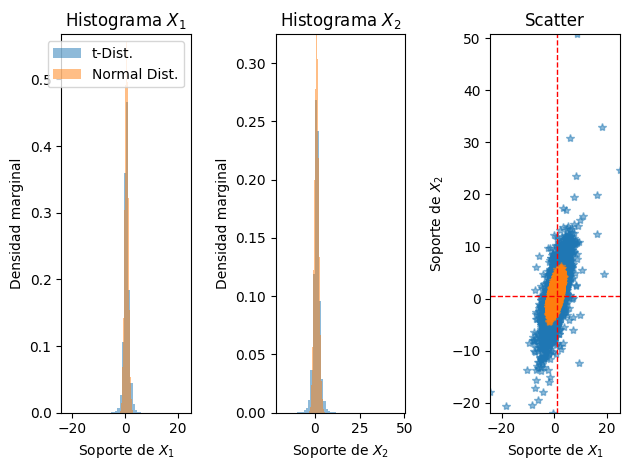

In [12]:
num_bins = 60
fig, (ax0, ax1, ax3) = plt.subplots(1,3)

ax0.hist(Xs[:,0], num_bins, density=True, alpha=0.5, label='t-Dist.')
ax0.hist(Xs_normal[:, 0], num_bins, density=True, alpha=0.5, label='Normal Dist.')
ax0.set_xlabel('Soporte de $X_1$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $X_1$')
ax0.legend()
ax0.autoscale(enable=True, axis='both', tight=True)

ax1.hist(Xs[:,1], num_bins, density=True, alpha=0.5, label='t-Dist.')
ax1.hist(Xs_normal[:, 1], num_bins, density=True, alpha=0.5, label='Normal Dist.')
ax1.set_xlabel('Soporte de $X_2$')
ax1.set_ylabel('Densidad marginal')
ax1.set_title(r'Histograma $X_2$')
ax1.autoscale(enable=True, axis='both', tight=True)

ax3.plot(Xs[:,0], Xs[:,1], '*',alpha=0.5, label='t-Dist.')
ax3.plot(Xs_normal[:,0], Xs_normal[:,1], '*',alpha=0.5, label='Normal Dist.')
ax3.axhline(0.5, color='red', lw=1,ls='--')
ax3.axvline(1.0, color='red', lw=1,ls='--')
ax3.set_xlabel('Soporte de $X_1$')
ax3.set_ylabel('Soporte de $X_2$')
ax3.set_title(r'Scatter')
ax3.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()

numbins es cuantas columnas

density true para que se aproxime a una integral = 1

es una funcion bivariada, hay más info en el scatter

como es vibariada es una campana, proyecta los valores simulados en el eje x1,x2. Si fuera como una normal, se situan en la media, en el caso de la t student que es la más real son los puntos azules. Lo ideal son los puntos azules

a la izquiera, esta por separado la dist de x1 y x2, vemos que para x1 y x2 el valor marginal no se aproxima tanto ala distribucipon verdadera, en general difieren significativamente

la marginal de x coincide con una t student

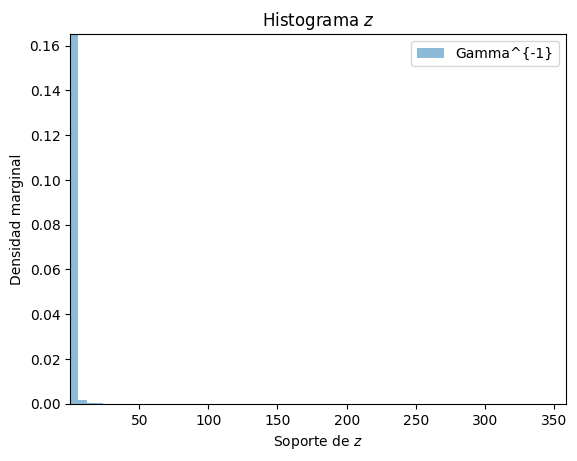

In [13]:
num_bins = 60
fig, (ax0) = plt.subplots(1,1)
ax0.hist(zs, num_bins, density=True, alpha=0.5, label='Gamma^{-1}')
ax0.set_xlabel('Soporte de $z$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $z$')
ax0.legend()
ax0.autoscale(enable=True, axis='both', tight=True)

### Gibbs-sampling
Se requiere simular secuecnialmente $p(z|\mathbf{X})$ y $p(\mathbf{X}|z)$. En nuestro caso en particular $p(z|\mathbf{X})=p(z)$. Así que Gibbs-sampling se puede implementar de la siguiente manera:
1. Generamos los objetos para guardar los resultados

____________________________________
en general la forma de la posterior no va a ser de una dist conocida, por eso trabajamos con las condicionales

la condicional de x es normal




en el caso de x se escogio la media

el mu es 0.5 y 1

pero si hubieran sido otros puntos raros como 100000000 y 1000000, osea lejanos de 0.5 y 1, la simulacion se malogra

si pruebo y no quemo nada, no sale nada en el gráfico

In [14]:
Xs_GS = mu.reshape((1,-1)) #*0+1000000
zs_GS = np.array([[Ez]])
nburn = 10**2

voy a quemar 100 observaciones

tengo los valores iniciales, simulo z porque es marginal y no condicional (es lo más facil)

todo lo guardo en objetos, en vectores, de tamaño n sample 1


2. Implementando la recursión

In [15]:
## nsample = 10**4
## nburn = 1

si aca probaramos con los puntos raros y quemando pocos, los puntos azules se asemejan mucho a los naranjas, si quemo más ya mejora el resultado.

no está aca el grafico pero si pruebo normal con los puntos 0, 5 y 1, veo que a medida que aumentan las simulaciones, se ve un grafico de una linea que empieza arriba y decrece hasta converger alrededor de 0.5

In [16]:
for jj in range(1,nburn+nsample):
    z_jm1 = zs_GS[jj-1].item()  # Punto inicial para z (de recursión previa)
    X_jj  = np.random.multivariate_normal(mu, z_jm1*Omega, size=1)
    z_jj  = invgamma.rvs(a=alpha, scale=beta, size=1).reshape((1,-1))

    Xs_GS = np.r_[Xs_GS,X_jj]
    zs_GS = np.r_[zs_GS,z_jj]

Xs_GS=np.delete(Xs_GS, range(nburn), 0)
zs_GS=np.delete(zs_GS, range(nburn), 0)

------------------
estamos haciendo un bucle

jm1 es j menos 1

el valor anterior de z lo imputa en omega

tengo una x condicional a z

el z jj es una gamma inversa y no esta condicionada a x

las guardo en el vector que guarda las simulaciones

quemo las primeras nburn observaciones, en este caso 100

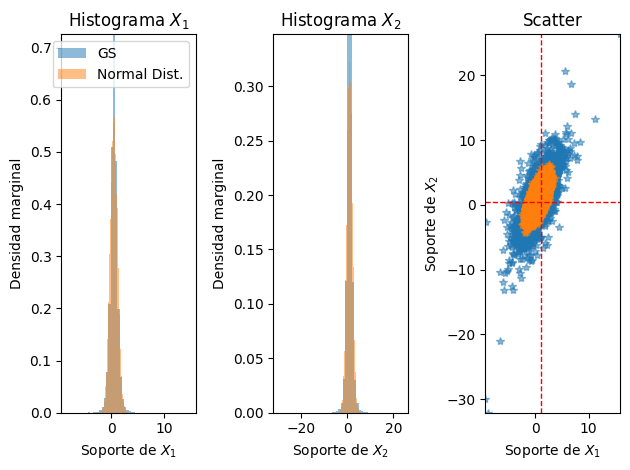

In [17]:
num_bins = 60
fig, (ax0, ax1, ax3) = plt.subplots(1,3)

ax0.hist(Xs_GS[:,0], num_bins, density=True, alpha=0.5, label='GS')
ax0.hist(Xs_normal[:, 0], num_bins, density=True, alpha=0.5, label='Normal Dist.')
ax0.set_xlabel('Soporte de $X_1$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $X_1$')
ax0.legend()
ax0.autoscale(enable=True, axis='both', tight=True)

ax1.hist(Xs_GS[:,1], num_bins, density=True, alpha=0.5, label='GS')
ax1.hist(Xs_normal[:, 1], num_bins, density=True, alpha=0.5, label='Normal Dist.')
ax1.set_xlabel('Soporte de $X_2$')
ax1.set_ylabel('Densidad marginal')
ax1.set_title(r'Histograma $X_2$')
ax1.autoscale(enable=True, axis='both', tight=True)

ax3.plot(Xs_GS[:,0], Xs_GS[:,1], '*',alpha=0.5, label='GS')
ax3.plot(Xs_normal[:,0], Xs_normal[:,1], '*',alpha=0.5, label='Normal Dist.')
ax3.axhline(0.5, color='red', lw=1,ls='--')
ax3.axvline(1.0, color='red', lw=1,ls='--')
ax3.set_xlabel('Soporte de $X_1$')
ax3.set_ylabel('Soporte de $X_2$')
ax3.set_title(r'Scatter')
ax3.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()

el azul es gibb sampling, similar a la distribucion pegada a las colas que vimos antes con t student



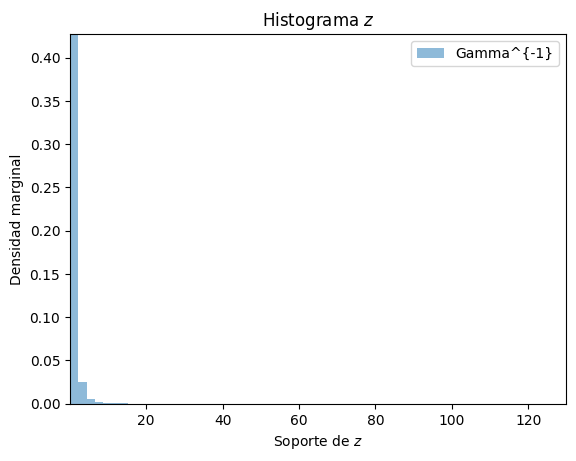

In [18]:
num_bins = 60
fig, (ax0) = plt.subplots(1,1)
ax0.hist(zs_GS, num_bins, density=True, alpha=0.5, label='Gamma^{-1}')
ax0.set_xlabel('Soporte de $z$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $z$')
ax0.legend()
ax0.autoscale(enable=True, axis='both', tight=True)

### MH
1. Se necesita tener la capacidad de evaluar la densidad conjunta:
$$p(\mathbf{X},z)=p(\mathbf{X}|z)p(z)$$
$$p(\mathbf{X},z)=\frac{1}{(2\pi) |z\boldsymbol{\Omega}|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'(z\boldsymbol{\Omega})^{-1}(\mathbf{X} - \boldsymbol{\mu})\right)\frac{\beta^{\alpha}}{\Gamma(\alpha)}z^{-\alpha-1}\exp\left(-\frac{\beta}{z}\right)$$
$$p(\mathbf{X},z)=\frac{\beta^{\alpha}}{(2\pi) |\boldsymbol{\Omega}|^{1/2}\Gamma(\alpha)}\exp\left(-\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'(z\boldsymbol{\Omega})^{-1}(\mathbf{X} - \boldsymbol{\mu})\right)z^{-\alpha-2}\exp\left(-\frac{\beta}{z}\right)$$
$$p(\mathbf{X},z)\propto\exp\left(-\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'(z\boldsymbol{\Omega})^{-1}(\mathbf{X} - \boldsymbol{\mu})\right)z^{-\alpha-2}\exp\left(-\frac{\beta}{z}\right)$$
en logaritmos
$$\log p(\mathbf{X},z)\propto-(\alpha+2)\log z-\left[\beta+\frac{1}{2}(\mathbf{X} - \boldsymbol{\mu})'\boldsymbol{\Omega}^{-1}(\mathbf{X} - \boldsymbol{\mu})\right] z^{-1}$$

------------------
el P(x,z) es el g de las notas de clase

una vez que se fija beta, alpha y omega se vuelve un número entonces se puede eliminar, lo vuelvo alpha

en la 4ta linea es p(x,z) =

si trabajo en ln ahora ln alpha = min (log f(x*) - log f (x*i-1 , 0) ---está en las notas de clase (1)

g(x) es el output, para lo cual aplicamos MH

En MH necesitas varias distribuciones, y necesitamos los siguientes insumos:

inputs:
1. función proporcional f(X) || g(x) ++ f(x) una funcion de densidad f(x) proporcional al g(x)
2. candidate generating function q( x^i-1 , x^i) || RW + Normal
3. punto inicial
4. alpha = min [f(x*) / f(x^i-1)]


output: target density g(x)


f es la funcion proporcional a la funcion objetivo
alpha es el ratio, si el ratio es mayor a 1, como tenemos que escoger el minimo, se escoge el 1.

si es más alto, doy el salto y si es menor a 1 vuelvo a la obs anterior.
mientras más pequeño menor la prob de saltar

In [19]:
def logp_prop(w,mu,iOmega,alpha,beta):
    X = w[:2].reshape(-1,1)
    z = w[2].item()
    if z<=0:
        return -10e100
    else:
        DX = X-mu.reshape(-1,1)
        XX = np.dot(np.dot(DX.T,iOmega),DX)
        return (-(alpha+2)*np.log(z)-(beta + 0.5*XX)/z ).item()

mu, omega, alpha y beta ya conocemos, w es lo nuevo pero acá acumularemos las simulaciones. Cabe resaltar que w es una matriz porque hay x y z

[:2] se refiere que agarra de 0 a 2

z es una varianza y no puede ser negativa, por eso le introduzco una condicion para que sea mayor a 0

cuando z es negativo da una probabilidad muyyy baja, por eso -10e100

en general, se esta reproduciendo la funcion de densidad pero en logaritmos

2. Para definir un punto inicial, calculamos la moda

In [20]:
# Punto inicial para busqueda de moda
iOmega = np.linalg.inv(Omega)
w0 = np.r_[mu.reshape((-1,1)),np.array([[Ez]])]

----------
defino la inversa de omega

para el punto inicial maximizo la densidad



In [21]:
def get_mode(w): return -logp_prop(w,mu,iOmega,alpha,beta)
res = minimize(get_mode, w0.reshape((-1,))*0+0.1, method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -1.545177
         Iterations: 15
         Function evaluations: 80
         Gradient evaluations: 20


------------
BFGS es algoritmo de optimizacion

In [23]:
#ress.hess_inv ## se agregó en clase, probar si sale el valor

------
para definir la moda es el negativo del log prop, osea * -1

minimiza la funcion


Recuperandola información de la moda

In [24]:
wmode = res.x
varmode = res.hess_inv
LTOmega = np.linalg.cholesky(varmode)

-------
la inversa de la hessiana recuperar las segundas derivadas

en varmode se guarda la inv de la hessiana

lt omega descompone por cholesky en 2 matrices triangulares

la moda se esta guardando en el objeto res

3. Recursión de MH

Observe que a diferencia del algoritmo en las notas de clase, aquí se esta utilizando una versión en logaritmos

$$w^{*}=w^{(j-1)}+\varepsilon\text{ con }\varepsilon\sim\mathcal{N}(0,scale\times\Omega)$$

En las notas de clase, la probabilidad $\alpha$ es
$$\alpha=\min\left[\frac{f(w^{*})}{f(w^{(j-1)})},1\right]$$

En logaritmos se tiene:
$$\log\alpha=\min\left[\log f(w^{*}) - \log f(w^{(j-1)}),0\right]$$

De acuerdo con ello, la recursión principal es:

------
el omega es el LTOmega



In [25]:
wsim = np.zeros(shape=(3,nburn+nsample))
scale = 2.5 # 0.5 6
for jj in range(nburn+nsample):
    if jj==0:
        wsim[:,jj] = np.ndarray.flatten(wmode)
        logp_old = logp_prop(wsim[:,jj],mu,iOmega,alpha,beta)
        aceptance = 1
    else:
        candidate = wsim[:,jj-1].reshape((-1,1))
        candidate = candidate + scale*np.dot(LTOmega,np.random.randn(3,1))
        eu = np.random.uniform(0,1)
        if eu < 1e-20:
            u = -10**100
        else:
            u = np.log(eu).item()

        logp_new = logp_prop(candidate,mu,iOmega,alpha,beta)
        logalpha = min( logp_new-logp_old,0 )
        if u <= logalpha:
            wsim[:,jj] = np.ndarray.flatten(candidate)
            logp_old = logp_new
            aceptance += 1
        else:
            wsim[:,jj] = wsim[:,jj-1]

wsim = np.delete(wsim, range(nburn), 1)
aceptance = (aceptance/(nburn+nsample))*100
aceptance

31.952047952047952

primero se hace espacio para la simulacion de los

1, 2 condicional y el z, total simulo 3 elementos

almaceno como primera simulacion a la moda

log_old es el valor de la densidad evaluado en x0

hacia adelante, se hace lo del algoritmo de MH

candidate es el aleatorio

1. simulacion anterior + escala (cholesky que es el LTOmega, random

luego de tener el candidato simulo el umbral eu

calculo logaritmo para el umbrar porque se está trabajando con el log alpha

calculo el log_pnew y luego ya se puede el log alpha, este ultimo calcula el min entre new y old

si es menor que log alpha acepto yse vuelve candidato

de lo contrario se vuelve el x i-1

randn es la simulacion de una normal estandar con media 0 varianza 1

In [26]:
Xs_MH = wsim[:2,:].T
zs_MH = wsim[2,:].T

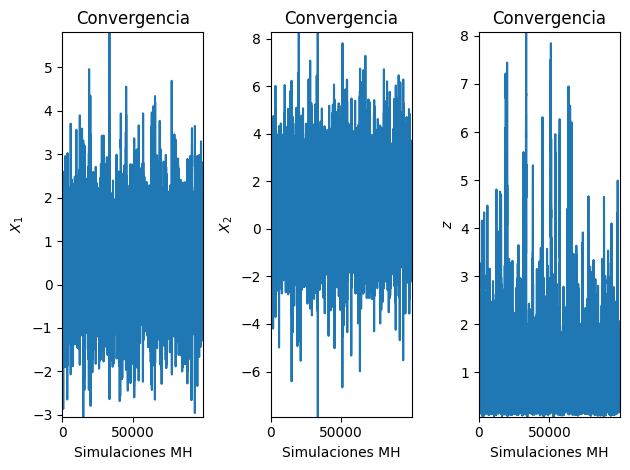

In [27]:
fig, axs = plt.subplots(1,3)

line0, = axs[0].plot(Xs_MH[:,0])
axs[0].set_xlabel('Simulaciones MH')
axs[0].set_ylabel('$X_1$')
axs[0].set_title(r'Convergencia')
axs[0].autoscale(enable=True, axis='both', tight=True)

line1, = axs[1].plot(Xs_MH[:,1])
axs[1].set_xlabel('Simulaciones MH')
axs[1].set_ylabel('$X_2$')
axs[1].set_title(r'Convergencia')
axs[1].autoscale(enable=True, axis='both', tight=True)

line1, = axs[2].plot(zs_MH)
axs[2].set_xlabel('Simulaciones MH')
axs[2].set_ylabel('$z$')
axs[2].set_title(r'Convergencia')
axs[2].autoscale(enable=True, axis='both', tight=True)


plt.tight_layout()

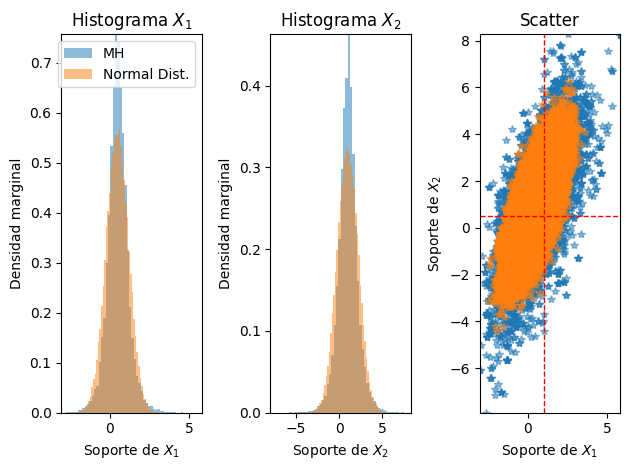

In [28]:
num_bins = 60
fig, (ax0, ax1, ax3) = plt.subplots(1,3)

ax0.hist(Xs_MH[:,0], num_bins, density=True, alpha=0.5, label='MH')
ax0.hist(Xs_normal[:, 0], num_bins, density=True, alpha=0.5, label='Normal Dist.')
ax0.set_xlabel('Soporte de $X_1$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $X_1$')
ax0.legend()
ax0.autoscale(enable=True, axis='both', tight=True)

ax1.hist(Xs_MH[:,1], num_bins, density=True, alpha=0.5, label='MH')
ax1.hist(Xs_normal[:, 1], num_bins, density=True, alpha=0.5, label='Normal Dist.')
ax1.set_xlabel('Soporte de $X_2$')
ax1.set_ylabel('Densidad marginal')
ax1.set_title(r'Histograma $X_2$')
ax1.autoscale(enable=True, axis='both', tight=True)

ax3.plot(Xs_MH[:,0], Xs_MH[:,1], '*',alpha=0.5, label='MH')
ax3.plot(Xs_normal[:,0], Xs_normal[:,1], '*',alpha=0.5, label='Normal Dist.')
ax3.axhline(0.5, color='red', lw=1,ls='--')
ax3.axvline(1.0, color='red', lw=1,ls='--')
ax3.set_xlabel('Soporte de $X_1$')
ax3.set_ylabel('Soporte de $X_2$')
ax3.set_title(r'Scatter')
ax3.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()

se hace el histograma del ultimo elemento del vector para probar

no se parece tanto en x1 y x2, a comparación de gibbs, se asemeja a la distribución

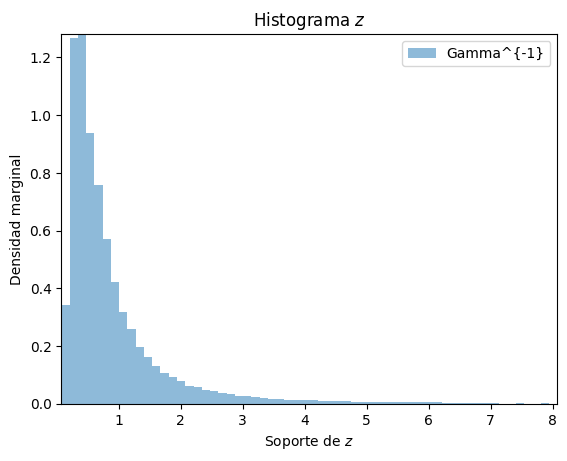

In [29]:
num_bins = 60
fig, (ax0) = plt.subplots(1,1)
ax0.hist(zs_MH, num_bins, density=True, alpha=0.5, label='Gamma^{-1}')
ax0.set_xlabel('Soporte de $z$')
ax0.set_ylabel('Densidad marginal')
ax0.set_title(r'Histograma $z$')
ax0.legend()
ax0.autoscale(enable=True, axis='both', tight=True)